<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Notebook-Configuration" data-toc-modified-id="Notebook-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Configuration</a></span><ul class="toc-item"><li><span><a href="#Google-drive" data-toc-modified-id="Google-drive-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Google drive</a></span></li><li><span><a href="#Warning" data-toc-modified-id="Warning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Warning</a></span></li><li><span><a href="#Matplotlib" data-toc-modified-id="Matplotlib-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Matplotlib</a></span></li><li><span><a href="#TensorFlow" data-toc-modified-id="TensorFlow-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>TensorFlow</a></span></li><li><span><a href="#Random-seed" data-toc-modified-id="Random-seed-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random seed</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Selection</a></span></li><li><span><a href="#Generating-the-Submission-File" data-toc-modified-id="Generating-the-Submission-File-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Generating the Submission File</a></span><ul class="toc-item"><li><span><a href="#Creating-the-directory-for-the-submission-file" data-toc-modified-id="Creating-the-directory-for-the-submission-file-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Creating the directory for the submission file</a></span></li><li><span><a href="#Generating-the-submission-file" data-toc-modified-id="Generating-the-submission-file-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Generating the submission file</a></span></li></ul></li></ul></div>

<b>
<p>
<center>
<font size="5">
Popular Machine Learning Methods: Idea, Practice and Math
</font>
</center>
</p>

<p>
<center>
<font size="4">
Part 2, Chapter 2, Section 4: Shallow Neural Networks
</font>
</center>
</p>
    
<p>
<center>
<font size="4">
Homework 2
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Yuxiao Huang
</font>
</center>
</p>
</b>

# Overview

- This notebook includes homework 2 for Shallow Neural Networks (Part 2, Chapter 2, Section 4).
- See the accompanied slides in our [github repository](https://github.com/yuxiaohuang/teaching/tree/master/gwu/machine_learning_I/fall_2022/slides/p2_shallow_learning/p2_c2_supervised_learning/p2_c2_s4_shallow_neural_networks).
- Here we will work on kaggle competation [Santander Customer Transaction Prediction].(https://www.kaggle.com/c/santander-customer-transaction-prediction/overview)
- The goal of this homework is tweaking the pipeline (including data preprocessing, hyperparameter tuning and model selection) implemented in [/p2 c2 s4 shallow neural_networks/case_study](https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/fall_2022/code/p2_shallow_learning/p2_c2_supervised_learning/p2_c2_s4_shallow_neural_networks/case_study/case_study.ipynb) to make it work for the new kaggle competation mentioned above.
- Complete the missing parts indicated by # Implement me.
- Particularly, the code should
    - be bug-free (note that the output produced by your solution may not necessarily be the same as the provided output, due to version issues)
    - be commented
- **The baseline for this assignment is 0.670522. As per the grading rubrics (section 15 of the syllabus), if the validation score of your best model is lower than or the same as the baseline, you will only receive 80% of the full mark. See more details in the grading rubrics.**
- Submit an ipynb file named homework_2.ipynb to [blackboard](https://blackboard.gwu.edu) folder /Assignments/Homework_2/.

# Notebook Configuration

## Google drive

In [1]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/homework/homework_2/'

# Get the absolute path of the shallow utilities folder
abspath_util_shallow = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/code/utilities/p2_shallow_learning/'

# Get the absolute path of the shallow models folder
abspath_model_shallow = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/code/models/p2_shallow_learning/'

## Warning

In [2]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [4]:
# The magic below allows us to use tensorflow version 2.x
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH']='true'
# %tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential

## Random seed

In [5]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

## Import utilities notebook

In [6]:
# Change working directory to the absolute path of the shallow utilities folder
%cd $abspath_util_shallow

# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb

## Load data

In [7]:
import pandas as pd

df_raw_train = pd.read_csv(abspath_curr + 'data/train.csv', header=0)
df_train = df_raw_train.copy(deep=True)

df_raw_test = pd.read_csv(abspath_curr + 'data/test.csv', header=0)
df_test = df_raw_test.copy(deep=True)

target = 'target'

In [8]:
# Print the dimension of df_train
pd.DataFrame({'Training':{'Instances':df_train.shape[0], 'Features':df_train.shape[1]},
              'Testing':{'Instances':df_test.shape[0], 'Features':df_test.shape[1]}}).T

,Instances,Features
Training,200000,202
Testing,200000,201


### Glimpse of the dataset

In [9]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


## Splitting the data

In [10]:
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and validation (20%)
df_train, df_val = train_test_split(df_train, train_size=0.8, random_state=random_seed)

# Reset the index
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

# Print the dimension of df_train
pd.DataFrame({'Training':{'Instances':df_train.shape[0], 'Features':df_train.shape[1]},
              'Testing':{'Instances':df_test.shape[0], 'Features':df_test.shape[1]}}).T

,Instances,Features
Training,160000,202
Testing,200000,201


## Handling uncommon features

In [11]:
# Call common_var_checker
# See the implementation in pmlm_utilities.ipynb
df_common_var = common_var_checker(df_train, df_val, df_test, target)

# Print df_common_var
# df_common_var

In [12]:
uncommon_feature_train_not_val_test = np.setdiff1d(df_train.columns, df_common_var['common var'])
uncommon_feature_val_not_train_test = np.setdiff1d(df_val.columns, df_common_var['common var'])
uncommon_feature_test_not_train_val = np.setdiff1d(df_test.columns, df_common_var['common var'])

# Print the uncommon features
if len(uncommon_feature_train_not_val_test) > 0:
    print(f'Training:\n{pd.DataFrame(uncommon_feature_train_not_val_test, columns=["uncommon feature"])}')
    df_train = df_train.drop(columns=uncommon_feature_train_not_val_test)

if len(uncommon_feature_val_not_train_test) > 0:
    print(f'Validation:\n\n{pd.DataFrame(uncommon_feature_val_not_train_test, columns=["uncommon feature"])}')
    df_val = df_val.drop(columns=uncommon_feature_val_not_train_test)
    
if len(uncommon_feature_test_not_train_val) > 0:
    print(f'Testing:\n\n{pd.DataFrame(uncommon_feature_test_not_train_val, columns=["uncommon feature"])}')
    df_test = df_test.drop(columns=uncommon_feature_test_not_train_val)

## Handling Identifiers

### Retrieve the identifier columns and have them removed from all subsets

In [13]:
df = pd.concat([df_train, df_val, df_test], sort=False)
df_id = id_checker(df)

# Remove identifiers from df_train
df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns), inplace=True)
# Remove identifiers from df_val
df_val.drop(columns=np.intersect1d(df_id.columns, df_val.columns), inplace=True)
# Remove identifiers from df_test
df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns), inplace=True)

##### Note: At this stage only the subsets have the up to date copy, not the combined df

## DateTime Transformation

In [14]:
df_train.dtypes[df_train.dtypes != 'float64']

target    int64
dtype: object

#### This step is ignored as it appears that there exist no date time attributes

## Identify and impute the missing data

#### It is wise to combine the subsets here once again as only the subsets are up to date after the identifier removal step

In [15]:
df = pd.concat([df_train, df_val, df_test], sort=False)
df_nan = nan_checker(df)
df_nan

,var,proportion,dtype
0,target,0.5,float64


#### Since the data in the df is not shuffled, the subsets should remain in their respective position that we can access them with the aid of subset's size. Perhaps we can use the train set to estimate the statistical parameters of the distribution, and use it to impute the missing values on the other sets

In [16]:
# Segregating the data again
df_train = df.iloc[:df_train.shape[0], :]
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

# Print the dimension of df_train
pd.DataFrame({'Training':{'Instances':df_train.shape[0], 'Features':df_train.shape[1]},
              'Testing':{'Instances':df_test.shape[0], 'Features':df_test.shape[1]},
              'Validation':{'Instances':df_val.shape[0], 'Features':df_val.shape[1]}}).T

,Instances,Features
Training,160000,201
Testing,200000,201
Validation,40000,201


### Define method to impute the data

In [17]:
imputation_method = 'SimpleImputer'

### One way of imputing the data

In [18]:
df_nan

,var,proportion,dtype
0,target,0.5,float64


In [19]:
from sklearn.impute import SimpleImputer

if imputation_method == 'SimpleImputer':
    # If there are missing values
    if len(df_nan['var']) > 0:
        # The SimpleImputer
        si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

        # Impute the variables with missing values in df_train, df_val and df_test 
        df_train[df_nan['var']] = si.fit_transform(df_train[df_nan['var']])
        df_val[df_nan['var']] = si.transform(df_val[df_nan['var']])
        df_test[df_nan['var']] = si.transform(df_test[df_nan['var']])

### Encoding the data

In [20]:
df.dtypes[df.dtypes != 'float64']

Series([], dtype: object)

In [21]:
cat_var_checker(pd.concat([df_train, df_val, df_test], sort=False))

,var,nunique


In [22]:
df_train['target'].unique()

array([0., 1.])

##### Since there are no categorical variables in the feature set, I wish to ignore this step for the encoding features alone

In [23]:
df = pd.concat([df_train, df_val, df_test], sort=False)
df.loc[:, target] = df[target].astype(str)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[target] = le.fit_transform(df[target])

# Separating the data into subsets - training, validation, and testing
df_train = df.iloc[:df_train.shape[0], :]
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

df.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,12.3039,-8.3899,9.1944,8.0649,9.0247,-1.9559,5.1565,21.1631,2.7437,...,5.5185,7.9504,0.9184,5.9945,11.0078,-1.0936,-2.3412,8.1712,12.9046,-1.9309
1,0,15.4069,2.7820,9.2951,7.1997,8.5359,-4.5422,5.4210,9.9651,4.0623,...,3.0063,5.6555,2.1527,1.3518,15.4728,0.2686,6.5523,8.4698,22.0454,1.4756
2,0,9.6427,-4.6261,6.9610,5.4054,12.0859,-11.2917,4.5290,13.8605,-0.8366,...,3.4351,9.1779,1.5004,1.9895,20.4072,-0.1118,0.5692,9.3290,12.8980,-9.4318
3,1,9.6881,-5.6696,11.2709,8.2812,13.9232,-16.1434,4.9664,20.1092,-5.9868,...,-4.9494,9.2727,1.1371,3.7435,20.6906,1.3752,7.4442,9.2145,18.2777,-2.5865
4,0,7.1128,-2.0830,11.4807,8.3033,10.6180,-6.4743,5.0078,21.0212,-4.9779,...,7.3583,8.1992,1.3436,8.8929,21.6711,-2.0557,6.4975,8.3110,13.7728,-5.9028


### Integrity check

In [24]:
# Print the dimension of df_train
pd.DataFrame({'Training':{'Instances':df_train.shape[0], 'Features':df_train.shape[1]},
              'Testing':{'Instances':df_test.shape[0], 'Features':df_test.shape[1]},
              'Validation':{'Instances':df_val.shape[0], 'Features':df_val.shape[1]}}).T

,Instances,Features
Training,160000,201
Testing,200000,201
Validation,40000,201


### Splitting the data and transform to Numpy vars

In [25]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

### Scaling the data

In [26]:
df_train.iloc[:, :5].describe() # I set to 5 just to limit bombaring the screen

,target,var_0,var_1,var_2,var_3
count,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000
mean,0.100006,10.682738,-1.627696,10.717273,6.798320
std,0.300009,3.038333,4.048081,2.638754,2.047802
min,0.000000,0.452800,-15.043400,2.117100,-0.040200
25%,0.000000,8.457575,-4.739725,8.725700,5.250900
50%,0.000000,10.528250,-1.602700,10.585100,6.827800
75%,0.000000,12.757700,1.355125,12.516800,8.330000
max,1.000000,20.315000,10.376800,18.652100,13.188300


In [27]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_val = mms.transform(X_val)
X_test = mms.transform(X_test)

In [28]:
tmp_df = pd.DataFrame(np.vstack([X_train, X_val, X_test]))
tmp_df.iloc[:, :5].describe()

,0,1,2,3,4
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,0.514370,0.527827,0.520194,0.505936,0.469485
std,0.152974,0.159136,0.144428,0.142751,0.174465
min,-0.013297,0.000000,-0.084706,-0.027517,-0.025384
25%,0.402579,0.406079,0.415434,0.403526,0.336362
50%,0.506799,0.528871,0.522993,0.508377,0.468403
75%,0.619036,0.644898,0.624893,0.610529,0.604859
max,1.101117,1.000000,1.040518,1.000000,1.024560


#### Comparing the table prior to and after scaling, the first and the second order moment appears to be consistent across the features. Hence the scaling is complete

# Handling Class-Imbalance

In [29]:
df.shape

(400000, 201)

In [30]:
tmp_df.iloc[:, :5].describe()

,0,1,2,3,4
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,0.514370,0.527827,0.520194,0.505936,0.469485
std,0.152974,0.159136,0.144428,0.142751,0.174465
min,-0.013297,0.000000,-0.084706,-0.027517,-0.025384
25%,0.402579,0.406079,0.415434,0.403526,0.336362
50%,0.506799,0.528871,0.522993,0.508377,0.468403
75%,0.619036,0.644898,0.624893,0.610529,0.604859
max,1.101117,1.000000,1.040518,1.000000,1.024560


In [31]:
tmp_y = np.hstack([y_train, y_val, y_test])

In [32]:
# import seaborn as sns

# fig, axes = plt.subplots(2, 2)
# sns.scatterplot(data=pd.DataFrame({'X':tmp_df.iloc[:, 0], 'Y':tmp_df.iloc[:, 1], 'target':tmp_y}), x='X', y='Y', hue='target', ax=axes[0, 0])
# sns.scatterplot(data=pd.DataFrame({'X':tmp_df.iloc[:, 3], 'Y':tmp_df.iloc[:, 4], 'target':tmp_y}), x='X', y='Y', hue='target', ax=axes[0, 1])
# sns.scatterplot(data=pd.DataFrame({'X':tmp_df.iloc[:, 1], 'Y':tmp_df.iloc[:, 28], 'target':tmp_y}), x='X', y='Y', hue='target', ax=axes[1, 0])
# sns.scatterplot(data=pd.DataFrame({'X':tmp_df.iloc[:, 100], 'Y':tmp_df.iloc[:, 180], 'target':tmp_y}), x='X', y='Y', hue='target', ax=axes[1, 1])
# plt.show()

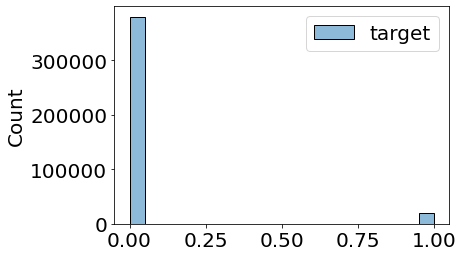

In [33]:
import seaborn as sns
plt.figure()
sns.histplot(pd.DataFrame({'target':tmp_y}))
plt.show()

### SMOTE to handle class-imbalance

#### Before we use SMOTE, we need to find out the K that is best to estimate the features

In [34]:
print(f'1={np.sum(y_train==0)} 2={np.sum(y_train==1)}')

1=143999 2=16001


In [35]:
X = np.vstack([X_train, X_val])
y = np.hstack([y_train, y_val])

In [173]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

k_range = [10, 20, 30, 40, 50, 100]
param_grid = {'n_neighbors':k_range}
grid_cv = GridSearchCV(knn, param_grid, cv=10, scoring='f1_weighted', n_jobs=-1,
                       return_train_score=True)
grid_cv = grid_cv.fit(X, y)

In [ ]:
print(f'Best score: {grid_cv.best_score_} Best K: {grid_cv.best_params_}')

In [36]:
print(f'1={np.sum(y==0)} 2={np.sum(y==1)}')

1=179902 2=20098


In [37]:
try:
    import imblearn
except:
    !pip install imblearn
    import imblearn

In [38]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=random_seed, sampling_strategy=1, 
           k_neighbors=grid_cv.best_params_['n_neighbors'],
           n_jobs=-1)
X, y = sm.fit_resample(X, y)

In [39]:
print(f'1={np.sum(y==0)} 2={np.sum(y==1)}')

1=179902 2=179902


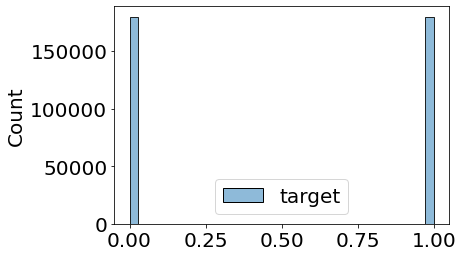

In [40]:
plt.figure()
sns.histplot(pd.DataFrame({'target':y}))
plt.show()

### Split the data into training, and validation subsets

In [41]:
indices = list(range(X.shape[0]))
tr_indices, vl_indices = train_test_split(indices, train_size=0.8, random_state=random_seed)

In [42]:
X_train = X[tr_indices]
X_val = X[vl_indices]

y_train = y[tr_indices]
y_val = y[vl_indices]

In [43]:
pd.DataFrame(X[:, [0, 10, 120, 150, 180]]).describe()

,0,1,2,3,4
count,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000
mean,0.524495,0.445618,0.534990,0.502361,0.443075
std,0.146722,0.136476,0.151133,0.142063,0.144700
min,-0.002235,0.000000,0.000000,0.000000,-0.000470
25%,0.417647,0.346597,0.422382,0.398661,0.345255
50%,0.518236,0.440846,0.535944,0.504205,0.450634
75%,0.624488,0.542217,0.646570,0.605642,0.546272
max,1.000000,1.000000,1.000000,1.002390,1.000000


# Hyperparameter Tuning

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

models = {'lr': LogisticRegression(class_weight='balanced', random_state=random_seed),
          'mlpc': MLPClassifier(early_stopping=True, random_state=random_seed)}

In [92]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [93]:
# Get the:
# feature matrix and target velctor in the combined training and validation data
# target vector in the combined training and validation data
# PredefinedSplit
# See the implementation in pmlm_utilities.ipynb
X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)

In [94]:
param_grids = {}

In [95]:
# The parameter grid of tol
tol_grid = [10 ** -5, 10 ** -4, 10 ** -3]

# The parameter grid of C
C_grid = [0.1, 1, 10]

# Update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]

In [96]:
# The grids for alpha
alpha_grids = [10 ** i for i in range(-5, -2)]

# The grids for learning_rate_init
learning_rate_init_grids = [10 ** i for i in range(-4, -1)]

# Update param_grids
param_grids['mlpc'] = [{'model__alpha': alpha_grids,
                        'model__learning_rate_init': learning_rate_init_grids}]

In [98]:
# Make directory
directory = os.path.dirname(abspath_curr + 'result/mnist/cv_results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [99]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=-1,
                      cv=ps,
                      return_train_score=True)
        
    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)
    
    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf=abspath_curr + 'result/mnist/cv_results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.878906,"{'model__alpha': 0.001, 'model__learning_rate_...","(MLPClassifier(alpha=0.001, early_stopping=Tru..."
1,0.801510,"{'model__C': 0.1, 'model__tol': 1e-05}","(LogisticRegression(C=0.1, class_weight='balan..."


In [105]:
best_score_params_estimator_gs[0][2]

Pipeline(steps=[('model',
                 MLPClassifier(alpha=0.001, early_stopping=True,
                               learning_rate_init=0.0001, random_state=42))])

# TensorFlow

##### I need to make some conscious decisions in tuning the hyper-parameters of the FNN model. As you may already know, tuning hyper-parameters such as the number of layers, and the number of neurons in a network is an expensive process.

## Early stopping callback

In [44]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                min_delta=1e-4,
                                                patience=50,
                                                verbose=1,
                                                mode='min',
                                                baseline=None,
                                                restore_best_weights=True # This should be expensive
                                              )

## Terminate on NaN

In [45]:
terminate_on_nan = tf.keras.callbacks.TerminateOnNaN()

In [46]:
n_classes = len(df.target.unique())
print(f'Total number of classes in the target: {n_classes}')

Total number of classes in the target: 2


## Metrics

In [47]:
def get_cm(y_true, y_pred):
    cm = np.zeros([n_classes, n_classes])
    for i in range(len(y_true)):
        actual = y_true[i]
        pred = y_pred[i]
        cm[actual, pred] += 1
    return cm

def get_precision_macro(cm):
    p_pos = cm[0,0]/(cm[0,0] + cm[1,0])
    p_neg = cm[1,1]/(cm[1,1] + cm[0,1])
    p_macro = 0.5 * (p_pos + p_neg)
    return p_macro

def get_recall_macro(cm):
    r_pos = (cm[0,0]+1e-2)/(cm[0,0] + cm[0,1])
    r_neg = (cm[1,1]+1e-2)/(cm[1,1] + cm[1,0])
    r_macro = 0.5 * (r_pos + r_neg)
    return r_macro

def f1_score(y_true, y_pred):
    cm = get_cm(y_true, y_pred)
    p_macro = get_precision_macro(cm)
    r_macro = get_recall_macro(cm)
    return (2*p_macro*r_macro)/(p_macro + r_macro)

def get_class(prob, threshold):
    pos_indices = prob >= threshold
    neg_indices = prob < threshold
    class_labels = np.array(prob)
    class_labels[pos_indices] = 1
    class_labels[neg_indices] = 0
    return class_labels.astype(np.int)

In [61]:
def get_performance_metrics(models, hist_list, X, y):
    threshold_grid = np.linspace(0.2, 0.73, 50)
    lowest_score_across_models = []
    f1_perf_of_each_model = {}
    for model_idx, (model, curr_hist) in enumerate(zip(models, hist_list)):
        vl_predicted = model.predict(X_val)
        f1_val = []
        best_f1_across_thres = 0
        hist_of_best_f1 = None
        best_threshold = None
        for threshold in threshold_grid:
            tmp_pred = get_class(vl_predicted[:, 0], threshold)
            f1_val.append(f1_score(y_val, tmp_pred))
            max_f1_curr_thres = np.max(f1_val)
            if max_f1_curr_thres > best_f1_across_thres:
                best_f1_across_thres = max_f1_curr_thres
                f1_perf_of_each_model[model_idx] = best_f1_across_thres
                hist_of_best_f1 = curr_hist
                best_threshold = threshold
    best_model_idx = max(f1_perf_of_each_model, key=f1_perf_of_each_model.get)
    print(f'Best model: {best_model_idx} best f1 macro score: {f1_perf_of_each_model[best_model_idx]}')
    return best_model_idx, f1_perf_of_each_model[best_model_idx], \
           hist_of_best_f1, f1_perf_of_each_model, best_threshold
            

In [68]:
def plot_perf_hist(hist_list, markers):
    plt.figure(figsize=(8, 6))
    for i, (hist, marker) in enumerate(zip(hist_list, markers)):
        plt.plot(list(range(len(hist.history['val_loss']))), 
                 hist.history['val_loss'], marker, label=f'Model{i+1}')
    plt.xlabel('Epochs')
    plt.ylabel('BCE Loss')
    plt.title('BCE comparison across models')
    plt.legend()
    plt.show()

### Model

In [50]:
from tensorflow.keras.regularizers import L1
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=1e-5)

In [51]:
tr_steps_per_epoch = 5
vl_steps_per_epoch = 2

In [52]:
model = Sequential([Dense(64, activation='selu', input_shape=[X_train.shape[1]]),
                    Dense(10, activation='selu'),
                    Dense(1, activation='sigmoid')])

model.compile(optimizer=rmsprop, loss='binary_crossentropy')
hist = model.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), 
                  steps_per_epoch=tr_steps_per_epoch,
                  validation_steps=vl_steps_per_epoch,
                  epochs=5000, callbacks=[es_callback, terminate_on_nan],
                  verbose=0)

2022-10-18 13:24:07.822449: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:42:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-18 13:24:07.832341: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:42:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-18 13:24:07.832721: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:42:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-18 13:24:07.834029: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [53]:
model2 = Sequential([Dense(128, activation='selu', input_shape=[X_train.shape[1]]),
                    Dense(10, activation='selu'),
                    Dense(1, activation='sigmoid')])

model2.compile(optimizer=rmsprop, loss='binary_crossentropy')
hist2 = model2.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), 
                  steps_per_epoch=tr_steps_per_epoch,
                  validation_steps=vl_steps_per_epoch,
                  epochs=5000, callbacks=[es_callback, terminate_on_nan],
                  verbose=0)

In [54]:
model3 = Sequential([Dense(256, activation='selu', input_shape=[X_train.shape[1]]),
                     Dense(128, activation='selu'),
                     Dense(10, activation='selu'),
                     Dense(1, activation='sigmoid')])

model3.compile(optimizer=rmsprop, loss='binary_crossentropy')
hist3 = model3.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), 
                  steps_per_epoch=tr_steps_per_epoch,
                  validation_steps=vl_steps_per_epoch,
                  epochs=5000, callbacks=[es_callback, terminate_on_nan],
                  verbose=0)

Restoring model weights from the end of the best epoch: 2892.
Epoch 2942: early stopping


In [55]:
model4 = Sequential([Dense(512, activation='selu', input_shape=[X_train.shape[1]]),
                     Dense(256, activation='selu'),
                     Dense(128, activation='selu'),
                     Dense(10, activation='selu'),
                     Dense(1, activation='sigmoid')])

model4.compile(optimizer=rmsprop, loss='binary_crossentropy')
hist4 = model4.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), 
                  steps_per_epoch=tr_steps_per_epoch,
                  validation_steps=vl_steps_per_epoch,
                  epochs=5000, callbacks=[es_callback, terminate_on_nan],
                  verbose=0)

Restoring model weights from the end of the best epoch: 1390.
Epoch 1440: early stopping


In [56]:
model5 = Sequential([Dense(1024, activation='selu', input_shape=[X_train.shape[1]]),
                     Dense(512, activation='selu'),
                     Dense(256, activation='selu'),
                     Dense(128, activation='selu'),
                     Dense(10, activation='selu'),
                     Dense(1, activation='sigmoid')])

model5.compile(optimizer=rmsprop, loss='binary_crossentropy')
hist5 = model5.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), 
                  steps_per_epoch=tr_steps_per_epoch,
                  validation_steps=vl_steps_per_epoch,
                  epochs=5000, callbacks=[es_callback, terminate_on_nan],
                  verbose=0)

Restoring model weights from the end of the best epoch: 756.
Epoch 806: early stopping


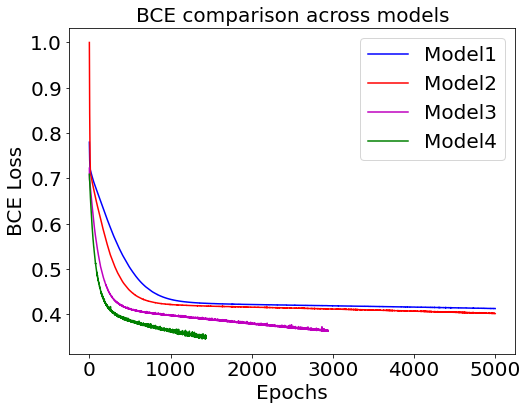

In [69]:
plot_perf_hist([hist, hist2, hist3, hist4], ['-b', '-r', '-m', '-g'])

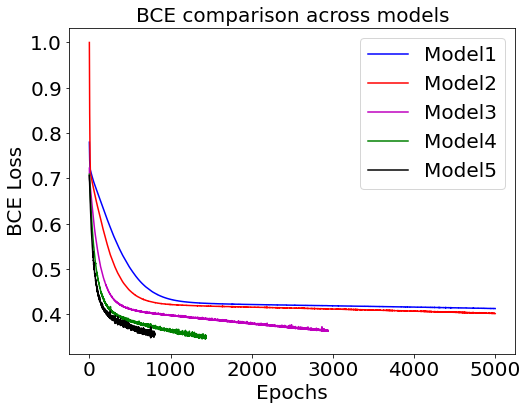

In [70]:
plot_perf_hist([hist, hist2, hist3, hist4, hist5], ['-b', '-r', '-m', '-g', '-k'])

In [59]:
models = [model, model2, model3, model4, model5]
hist_list = [hist, hist2, hist3, hist4, hist5]
best_model_idx, best_score, best_hist, f1_perf_of_each_model = get_performance_metrics(models, hist_list, 
                                                                                       X_val, y_val)

2249/2249 [==============================] - 8s 3ms/step
Best model: 4 best f1 macro score: 0.8573084011454466


### Learning Rate Callback

In [60]:
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
                                                    monitor='val_loss',
                                                    factor=0.1,
                                                    patience=10,
                                                    verbose=1,
                                                    mode='min',
                                                    min_delta=1e-4,
                                                    cooldown=0,
                                                    min_lr=1e-7)

##### Observing from the plot that makes BCE comparson across models, it appears model5 that starts with 1024 neurons, if my understanding is correct, suffers from higher learning rate. In order to observe further if the training can be improved, I wish to try implementing learning rate callback to observe it's effectiveness in offering anything to the betterment of the learning process

In [71]:
rmsprop2 = tf.keras.optimizers.RMSprop(learning_rate=1e-6)

In [73]:
model4_1 = Sequential([Dense(512, activation='selu', input_shape=[X_train.shape[1]]),
                       Dense(256, activation='selu'),
                       Dense(128, activation='selu'),
                       Dense(10, activation='selu'),
                       Dense(1, activation='sigmoid')])

model4_1.compile(optimizer=rmsprop2, loss='binary_crossentropy')
hist4_1 = model4_1.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), 
                       steps_per_epoch=tr_steps_per_epoch,
                       validation_steps=vl_steps_per_epoch,
                       epochs=10000, callbacks=[es_callback, terminate_on_nan],
                       verbose=0)

Restoring model weights from the end of the best epoch: 8340.
Epoch 8390: early stopping


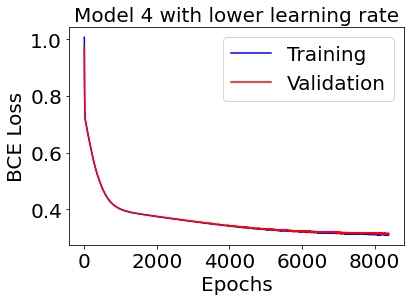

In [83]:
plt.figure()
plt.plot(list(range(len(hist4_1.history['loss']))), hist4_1.history['loss'], '-', color='blue', label='Training')
plt.plot(list(range(len(hist4_1.history['val_loss']))), hist4_1.history['val_loss'], '-', color='red', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('BCE Loss')
plt.title('Model 4 with lower learning rate')
plt.legend()
plt.show()

In [81]:
models = [model4_1]
hist_list = [hist4_1]
best_model_idx, best_score, best_hist, f1_perf_of_each_model, best_threshold = get_performance_metrics(models, hist_list, X_val, y_val)

2249/2249 [==============================] - 7s 3ms/step
Best model: 0 best f1 macro score: 0.8682833283110027


In [82]:
print(f'Best threshold: {best_threshold}')

Best threshold: 0.546122448979592


In [74]:
model5_1 = Sequential([Dense(1024, activation='selu', input_shape=[X_train.shape[1]]),
                       Dense(512, activation='selu'),
                       Dense(256, activation='selu'),
                       Dense(128, activation='selu'),
                       Dense(10, activation='selu'),
                       Dense(1, activation='sigmoid')])

model5_1.compile(optimizer=rmsprop2, loss='binary_crossentropy')
hist5_1 = model5_1.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), 
                       steps_per_epoch=tr_steps_per_epoch,
                       validation_steps=vl_steps_per_epoch,
                       epochs=10000, callbacks=[es_callback, terminate_on_nan, lr_callback],
                       verbose=0)


Epoch 1910: ReduceLROnPlateau reducing learning rate to 1e-07.
Restoring model weights from the end of the best epoch: 6850.
Epoch 6900: early stopping


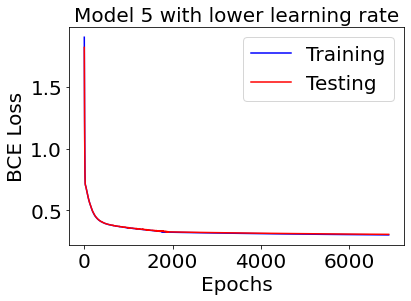

In [84]:
plt.figure()
plt.plot(list(range(len(hist5_1.history['loss']))), hist5_1.history['loss'], '-', color='blue', label='Training')
plt.plot(list(range(len(hist5_1.history['val_loss']))), hist5_1.history['val_loss'], '-', color='red', label='Testing')
plt.xlabel('Epochs')
plt.ylabel('BCE Loss')
plt.title('Model 5 with lower learning rate')
plt.legend()
plt.show()

In [79]:
# Just for Model 5- DELETE AFTER INSPECTING.......

models = [model4_1, model5_1]
hist_list = [hist4_1, hist5_1]
best_model_idx, best_score, best_hist, f1_perf_of_each_model, best_threshold = get_performance_metrics(models, hist_list, X_val, y_val)

2249/2249 [==============================] - 7s 3ms/step
Best model: 1 best f1 macro score: 0.8737092236537625


##### The index shown in the output of the previous cell starts from model4_1 = 0, to n models
##### Hence model 1 represets mode5_1

In [80]:
print(f'Best threshold: {best_threshold}')

Best threshold: 0.546122448979592


In [87]:
models = [model, model2, model3, model4, model5, model4_1, model5_1]
hist_list = [hist, hist2, hist3, hist4, hist5, hist4_1, hist5_1]
best_model_idx, best_score, best_hist, f1_perf_of_each_model, best_threshold = get_performance_metrics(models, hist_list, 
                                                                                                       X_val, y_val)

2249/2249 [==============================] - 6s 3ms/step
Best model: 6 best f1 macro score: 0.8737092236537625


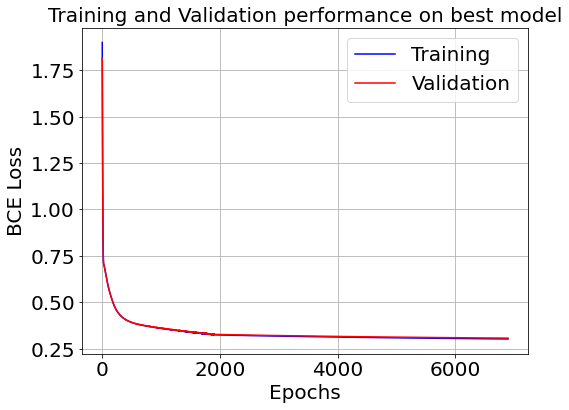

In [88]:
best_m_hist = best_hist.history
plt.figure(figsize=(8, 6))
plt.plot(list(range(len(best_m_hist['loss']))), best_m_hist['loss'], '-b', label='Training')
plt.plot(list(range(len(best_m_hist['val_loss']))), best_m_hist['val_loss'], '-r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('BCE Loss')
plt.title('Training and Validation performance on best model')
plt.legend()
plt.grid()
plt.show()

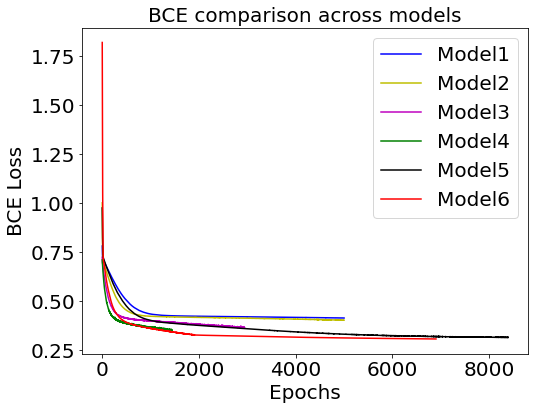

In [89]:
plot_perf_hist([hist, hist2, hist3, hist4, hist4_1, hist5_1], ['-b', '-y', '-m', '-g', '-k', 'r'])

# Model Selection

#### Combine the Validation and the training set

In [121]:
def learning_rate_sch(epoch):
    if epoch >= 1910:
        return 1e-7
    else:
        return 1e-6

cus_lr_callback = tf.keras.callbacks.LearningRateScheduler(learning_rate_sch, verbose=0)

In [124]:
best_model = Sequential([Dense(1024, activation='selu', input_shape=[X_train.shape[1]]),
                         Dense(512, activation='selu'),
                         Dense(256, activation='selu'),
                         Dense(128, activation='selu'),
                         Dense(10, activation='selu'),
                         Dense(1, activation='sigmoid')])

best_model.compile(optimizer=rmsprop2, loss='binary_crossentropy')
best_model_hist = best_model.fit(x=X_train_val, y=y_train_val, 
                            steps_per_epoch=tr_steps_per_epoch,
                            epochs=6900, callbacks=[terminate_on_nan, cus_lr_callback],
                            verbose=0)

In [125]:
best_model

# Generating the Submission File
Use the best model selected earlier to generate the submission file for this kaggle competition.

## Creating the directory for the submission file

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/submission/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Generating the submission file

In [ ]:
y_test_pred = best_model(X_test)

# Transform y_test_pred back to the original class=
y_test_pred = get_class(y_test_pred, best_threshold)

# Get the submission dataframe
df_submit = pd.DataFrame(np.hstack((df_raw_test[['ID_code']], y_test_pred.reshape(-1, 1))),
                         columns=['ID_code', target])                                                                                     

# Generate the submission file
df_submit.to_csv(abspath_curr + '/result/submission/submission.csv', index=False)